# Falcon Real Estate- Housing Price Predictor
## Supervised Regression Machine Learning Model Development
### By Nishantkumar V Patel


### 1. Loading and Overviewing the Dataset

In [1]:
import pandas as pd
import numpy as np
x=pd.read_csv("housing_data.csv")     #I have taken the data from Boston_Housing_Dataset

In [2]:
x.head()  #to take the just overview of the dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
x.info()  #to determine wheter any null values present in dataset or not...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    504 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      505 non-null    float64
 5   RM       503 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  505 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    504 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
from matplotlib import pyplot as plt

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

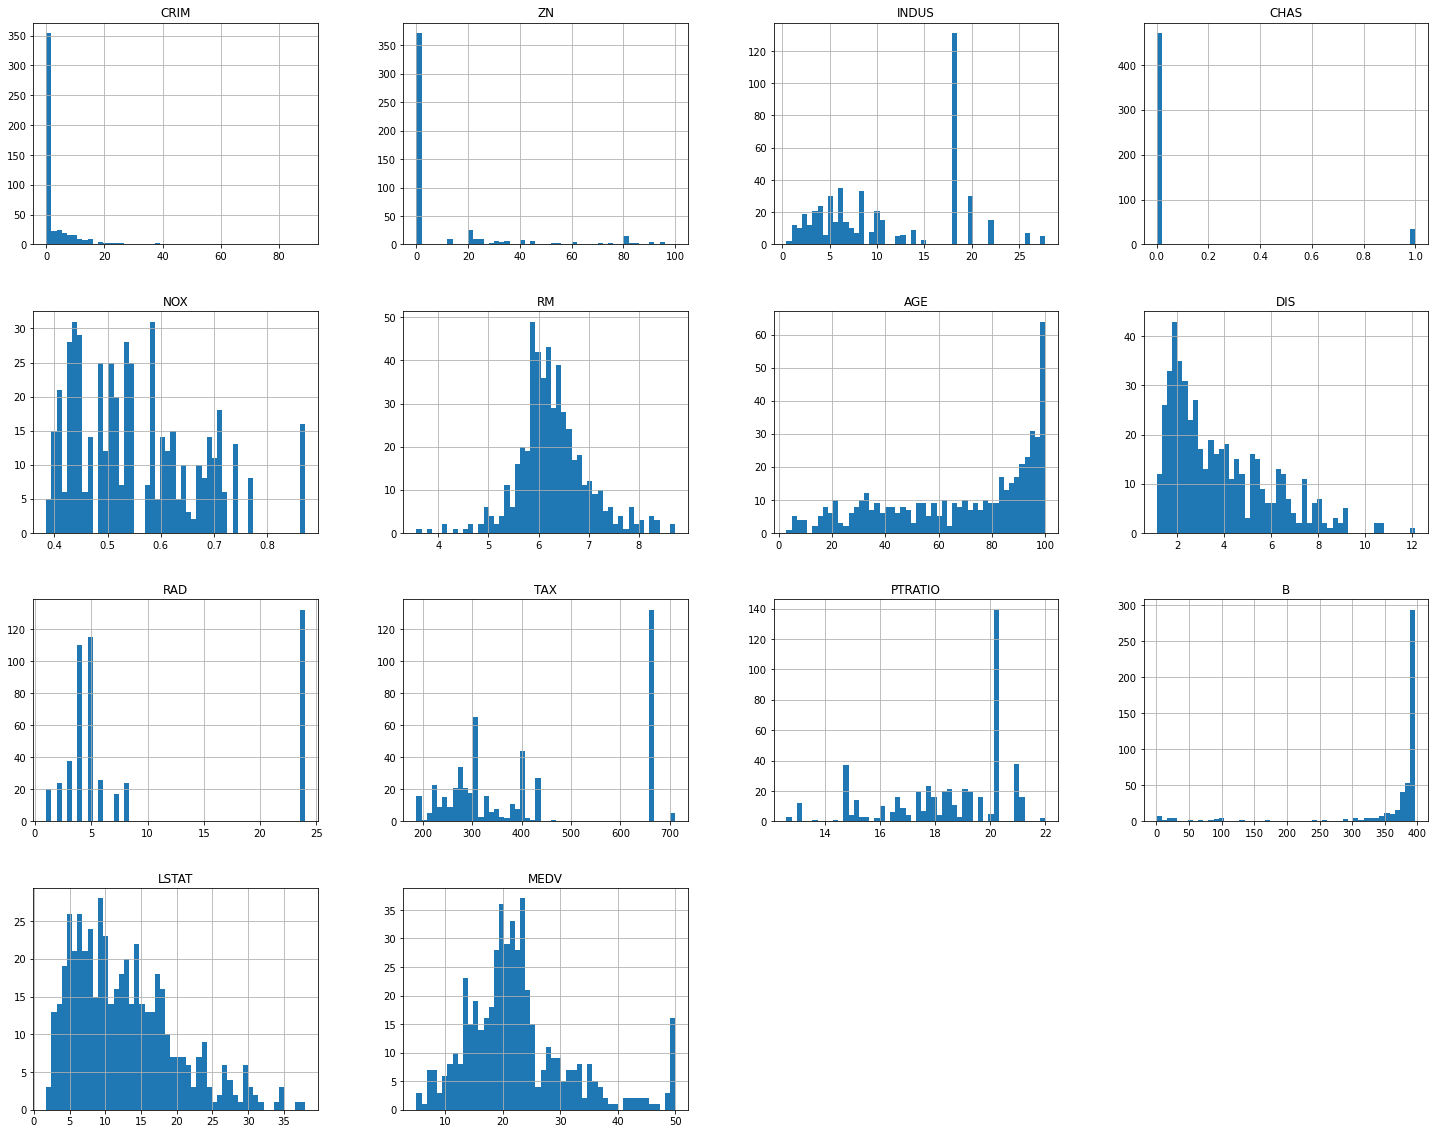

In [5]:
x.hist(bins=50, figsize=(25,20))   #to plot the hisrogram for each features

### 2. Fixing the Null Values

In [6]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median") #substitute the null values with strategy of the respective column/feature median
imputer.fit(x)
xx=imputer.transform(x)
x=pd.DataFrame(xx, columns=x.columns)
x.info() #now there is no null values left into dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### 3. Train Test Splitting

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train_set, test_set=train_test_split(x, test_size=0.2, random_state=42)  #I have taken the test set proportion of 20%and 80% for training for each features.
print(f"train_set={len(train_set)}\ntest_set={len(test_set)}")

train_set=404
test_set=102


In [9]:
from sklearn.model_selection import StratifiedShuffleSplit 

# CHAS is categorical or classified feature.
#So, it is important to fairly distributes the datapoints of CHAS feature which is categorical features for both train and test set.

In [10]:
split=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(x, x["CHAS"]):
    strat_train_set= x.loc[train_index]
    strat_test_set= x.loc[test_index]

In [11]:
x.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.605681,11.363636,11.134447,0.069170,0.554578,6.281304,68.616798,3.798327,9.549407,408.237154,18.453162,356.674032,12.656443,22.532806
std,8.602798,23.322453,6.843072,0.253994,0.115865,0.692954,28.146630,2.103503,8.707259,168.537116,2.163688,91.294864,7.138124,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887250,45.025000,2.101425,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.253870,0.000000,9.690000,0.000000,0.538000,6.209000,77.700000,3.215700,5.000000,330.000000,19.000000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.618750,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
print("train_set for CHAS categorical feature:\n", strat_train_set["CHAS"].value_counts())
print("test_set for CHAS categorical feature:\n", strat_test_set["CHAS"].value_counts())

train_set for CHAS categorical feature:
 0.0    376
1.0     28
Name: CHAS, dtype: int64
test_set for CHAS categorical feature:
 0.0    95
1.0     7
Name: CHAS, dtype: int64


### 4. Looking for Correlations

In [13]:
corr_matrix=x.corr()

In [14]:
corr_matrix["MEDV"].sort_values() #looking for correlations of all features with respect to Label- MEDV...

LSTAT     -0.737630
PTRATIO   -0.508221
INDUS     -0.480384
TAX       -0.468536
NOX       -0.426861
CRIM      -0.387679
RAD       -0.381626
AGE       -0.377411
CHAS       0.175260
DIS        0.249403
B          0.333461
ZN         0.360445
RM         0.704254
MEDV       1.000000
Name: MEDV, dtype: float64

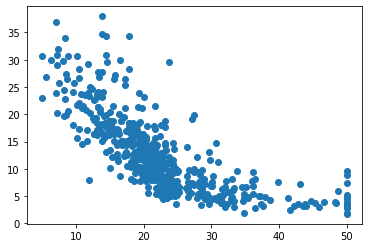

In [15]:
print(plt.scatter(x["MEDV"], x["LSTAT"])) #LSTAT feature makes the strong negative correlation with MEDV price label.

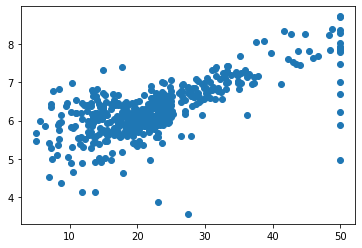

In [16]:
print(plt.scatter(x["MEDV"], x["RM"])) #RM feature makes the strong positive correlation with MEDV price label.

In [17]:
x_features= strat_train_set.drop("MEDV", axis=1)   #Seperating the features and labels from train dataset
x_labels= strat_train_set["MEDV"].copy()

### 5. Creating Pipeline

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler    #Standard Scaler is a class provided by Sklearn Module in Python.
my_pipeline= Pipeline([("imputer", SimpleImputer(strategy="median")), ("std_scaler", StandardScaler()),])

#Standard Scaler works-on by equation ((value-mean)/ standard deviation).

In [19]:
x_features=my_pipeline.fit_transform(x_features)
x_features #it is a numpy array.

array([[-0.43811632,  3.12628155, -1.12474383, ..., -0.97424379,
         0.41164221, -0.86193848],
       [-0.44221718,  3.12628155, -1.3627762 , ..., -0.6918948 ,
         0.39131918, -0.94223675],
       [ 0.15800499, -0.4898311 ,  0.98688082, ...,  0.81396648,
         0.44624347,  0.81463405],
       ...,
       [-0.43395368, -0.4898311 , -1.23426793, ..., -0.22131315,
         0.41831233, -1.27727437],
       [ 0.14329236, -0.4898311 ,  0.98688082, ...,  0.81396648,
        -3.15239177,  0.73848914],
       [-0.43843643, -0.4898311 ,  0.37208554, ..., -0.97424379,
         0.41070422,  0.09887187]])

### 6. Searching best suitable  Model for Price Predictor 

#### Running each Model by Commenting-out other 2 models in out of below 3-cells.

In [20]:
from sklearn.linear_model import LinearRegression   # Model No.1 Linear Regression
model=LinearRegression()

In [21]:
from sklearn.tree import DecisionTreeRegressor   # 2) Model No.2 Decision Tree Regressor
model=DecisionTreeRegressor()

In [22]:
from sklearn.ensemble import RandomForestRegressor   # 3) Model No.3 Random Forest Regressor
model=RandomForestRegressor()

In [23]:
model.fit(x_features, x_labels)  #feeding features and lables of our well prepared dataset into Model

RandomForestRegressor()

### 7. Evaluating the Different Models

In [24]:
x_features=pd.DataFrame(x_features)
some_data=x_features.iloc[:5]
some_labels=x_labels.iloc[:5]
prepared_data=my_pipeline.transform(some_data)
model.predict(prepared_data)
list(some_labels)

/Users/jamesbond/Downloads/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


[21.9, 24.5, 16.7, 23.1, 23.0]

In [25]:
from sklearn.metrics import mean_squared_error 
x_predictions=model.predict(x_features) #Predicting Root/Mean-Squared-Error (RMSE/MSE) of applied Model for our well prepared dataset.
linear_MSE=mean_squared_error(x_labels, x_predictions)
linear_RMSE= np.sqrt(linear_MSE)

In [26]:
linear_RMSE 

1.1478496566007297

In [27]:
from sklearn.model_selection import cross_val_score  #using the Cross-Validation technique
scores=cross_val_score(model, x_features, x_labels, scoring="neg_mean_squared_error", cv=10)
RMSE_scores=np.sqrt(-scores)

In [28]:
RMSE_scores

array([2.91903795, 2.9062953 , 3.13324479, 2.52920333, 3.62505493,
       2.6896593 , 4.78268543, 3.28438552, 3.47041866, 3.09987356])

In [29]:
def scores_function(scores):
    print("***",model,"Model Output Summary ***")
    print("\n")
    print("RMSE_scores Parameters: Scores, Mean and Standard Deviation")
    print("\n")
    print("1) Scores: ", scores)
    print(" ")
    print("2) Mean: ", scores.mean())
    print(" ")
    print("3) Standard Deviation: ", scores.std())

scores_function(RMSE_scores)

*** RandomForestRegressor() Model Output Summary ***


RMSE_scores Parameters: Scores, Mean and Standard Deviation


1) Scores:  [2.91903795 2.9062953  3.13324479 2.52920333 3.62505493 2.6896593
 4.78268543 3.28438552 3.47041866 3.09987356]
 
2) Mean:  3.2439858779751796
 
3) Standard Deviation:  0.6030392981248921


### 8. Selection of Final Model

In [30]:
def scores_function(scores):
    print("***",model,"Model Output Summary ***")
    print("\n")
    print("RMSE_scores Parameters: Scores, Mean and Standard Deviation")
    print("\n")
    print("1) Scores: ", scores)
    print(" ")
    print("2) Mean: ", scores.mean())
    print(" ")
    print("3) Standard Deviation: ", scores.std())

scores_function(RMSE_scores)

*** RandomForestRegressor() Model Output Summary ***


RMSE_scores Parameters: Scores, Mean and Standard Deviation


1) Scores:  [2.91903795 2.9062953  3.13324479 2.52920333 3.62505493 2.6896593
 4.78268543 3.28438552 3.47041866 3.09987356]
 
2) Mean:  3.2439858779751796
 
3) Standard Deviation:  0.6030392981248921


#### Random Forest Regressor depicts best Output Summary among 3 selected models.
#### Mean & Standard Deviation or Error of Random Forest Regressor is lower than other 2 models.

### 9. Model Testing

In [31]:
X_test=strat_test_set.drop("MEDV", axis=1)
Y_test=strat_test_set["MEDV"].copy()

In [32]:
X_test_prepared=my_pipeline.transform(X_test) #giving the test dataset to our trained model for testing.
final_predictions=model.predict(X_test_prepared)

In [33]:
final_MSE=mean_squared_error(Y_test, final_predictions) #Mean Squared Error
print("Final MSE:", final_MSE)

Final MSE: 8.90517632352941


In [34]:
final_RMSE=np.sqrt(final_MSE)  #Root Mean Squared Error
print("Final RMSE:", final_RMSE)

Final RMSE: 2.9841542057221857


### Scatter Diagram: Predicted Prices  V/s   Actual Prices

### Good Positive Correlation between trained model's Predicted Prices & Actual Prices

Text(0, 0.5, 'Predicted Prices')

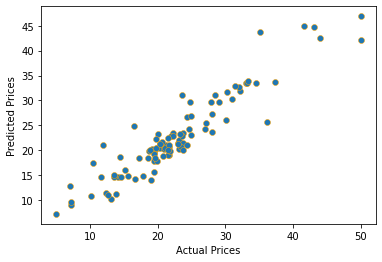

In [35]:
plt.scatter(Y_test, final_predictions, linewidths=0.5, edgecolors="orange")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")